In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor

In [3]:

import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

0.90


In [14]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [5]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [6]:
def fill_null(data):
  for i in data:
    if data[i].dtype == object:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
    else:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
  return data
train_x= fill_null(train_data)
test_x = fill_null(test_data)

In [7]:
nominal_column = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','Functional','GarageType','PavedDrive','SaleType']
ordinal_column = ['Utilities','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','CentralAir','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Heating','RoofMatl','Electrical','GarageFinish','GarageQual','GarageCond','SaleCondition']

In [ ]:
numerical_column = pd.DataFrame()
nominal = pd.DataFrame()
ordinal = pd.DataFrame()

numerical_test = pd.DataFrame()
nominal_test = pd.DataFrame()
ordinal_test = pd.DataFrame()

In [ ]:
for i in train_x:
  if (i not in ordinal_column) and (i not in nominal_column):
    numerical_column[i] = train_x[i]
  if (i not in ordinal_column) and (i not in nominal_column) and (i != 'SalePrice'):
    numerical_test[i] = test_x[i]
#numerical_column

In [ ]:
nominal = train_x.filter(nominal_column,axis = 1)
ordinal = train_x.filter(ordinal_column,axis = 1)
nominal_test = test_x.filter(nominal_column,axis = 1)
ordinal_test = test_x.filter(ordinal_column,axis = 1)
ordinal['SalePrice'] = train_x['SalePrice']
nominal['SalePrice'] = train_x['SalePrice']

In [ ]:
print(nominal.shape,' ',ordinal.shape,' ',numerical_column.shape)
print(nominal_test.shape,' ',ordinal_test.shape,' ',numerical_test.shape)

(1460, 19)   (1460, 21)   (1460, 37)
(1459, 18)   (1459, 20)   (1459, 36)


Nominal


In [ ]:
nominal.loc[nominal['Exterior1st'] == nominal['Exterior2nd'],'Exterior'] = 1
nominal.loc[nominal['Exterior1st'] != nominal['Exterior2nd'],'Exterior'] = 2
nominal.loc[nominal['Condition1'] == nominal['Condition2'],'Condition'] = 1
nominal.loc[nominal['Condition1'] != nominal['Condition2'],'Condition'] = 2
nominal = nominal.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

nominal_test.loc[nominal_test['Exterior1st'] == nominal_test['Exterior2nd'],'Exterior'] = 1
nominal_test.loc[nominal_test['Exterior1st'] != nominal_test['Exterior2nd'],'Exterior'] = 2
nominal_test.loc[nominal_test['Condition1'] == nominal_test['Condition2'],'Condition'] = 1
nominal_test.loc[nominal_test['Condition1'] != nominal_test['Condition2'],'Condition'] = 2
nominal_test = nominal_test.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [ ]:
temp = nominal
temp1 = nominal_test
#c = 0
for i in temp:
  if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition':
    #c = c + 1  and len(np.unique(temp[i])) == len(np.unique(nominal_test[i]))
    #print(i)
    t = pd.get_dummies(temp[i], drop_first = True)
    t1 = pd.get_dummies(temp1[i], drop_first = True)
    nominal = nominal.drop([i],axis = 1)
    nominal_test = nominal_test.drop([i],axis = 1)
    nominal = pd.concat([nominal,t],axis = 1)
    nominal_test = pd.concat([nominal_test,t1],axis = 1)
#nominal = nominal.drop(['Stone'],axis = 1)
#print(c)

In [ ]:
nominal = nominal.loc[:,~nominal.columns.duplicated()]
nominal_test = nominal_test.loc[:,~nominal_test.columns.duplicated()]

In [ ]:
col = ['SalePrice','PConc', 'NoRidge', 'Hip', 'NridgHt', 'Stone', 'StoneBr', 'RL']
#col = ['SalePrice','PConc']
nominal_final = nominal.filter(col,axis = 1)
nominal_final_test = nominal_test.filter(col,axis = 1)

In [ ]:
nominal_final = nominal
nominal_final_test = nominal_test

In [ ]:
print(nominal_final.shape,' ',nominal_final_test.shape)

(1460, 8)   (1459, 7)


In [ ]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
ordinal['Utilities'] = ordinal['Utilities'].map(utilities)
ordinal_test['Utilities'] = ordinal_test['Utilities'].map(utilities)

housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
ordinal['HouseStyle'] = ordinal['HouseStyle'].map(housStyle)
ordinal_test['HouseStyle'] = ordinal_test['HouseStyle'].map(housStyle)

extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['ExterQual'] = ordinal['ExterQual'].map(extraq)
ordinal_test['ExterQual'] = ordinal_test['ExterQual'].map(extraq)
extrac = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['ExterCond'] = ordinal['ExterCond'].map(extrac)
ordinal_test['ExterCond'] = ordinal_test['ExterCond'].map(extrac)


bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['BsmtQual'] = ordinal['BsmtQual'].map(bstmq)
ordinal_test['BsmtQual'] = ordinal_test['BsmtQual'].map(bstmq)
bstmc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['BsmtCond'] = ordinal['BsmtCond'].map(bstmc)
ordinal_test['BsmtCond'] = ordinal_test['BsmtCond'].map(bstmc)

bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
ordinal['BsmtFinType1'] = ordinal['BsmtFinType1'].map(bstmt1)
ordinal_test['BsmtFinType1'] = ordinal_test['BsmtFinType1'].map(bstmt1)
bstmt2 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
ordinal['BsmtFinType2'] = ordinal['BsmtFinType2'].map(bstmt2)
ordinal_test['BsmtFinType2'] = ordinal_test['BsmtFinType2'].map(bstmt2)

bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
ordinal['BsmtExposure'] = ordinal['BsmtExposure'].map(bstmexp)
ordinal_test['BsmtExposure'] = ordinal_test['BsmtExposure'].map(bstmexp)

heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['HeatingQC'] = ordinal['HeatingQC'].map(heat)
ordinal_test['HeatingQC'] = ordinal_test['HeatingQC'].map(heat)

elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}
ordinal['Electrical'] = ordinal['Electrical'].map(elec)
ordinal_test['Electrical'] = ordinal_test['Electrical'].map(elec)

kitch = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
ordinal['KitchenQual'] = ordinal['KitchenQual'].map(kitch)
ordinal_test['KitchenQual'] = ordinal_test['KitchenQual'].map(kitch)

grgq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['GarageQual'] = ordinal['GarageQual'].map(grgq)
ordinal_test['GarageQual'] = ordinal_test['GarageQual'].map(grgq)
grgc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
ordinal['GarageCond'] = ordinal['GarageCond'].map(grgc)
ordinal_test['GarageCond'] = ordinal_test['GarageCond'].map(grgc)

In [ ]:
ordinal['ExterCondition'] = (ordinal['ExterQual']+ordinal['ExterCond'])
ordinal['AvgRatFinArea'] = (ordinal['BsmtFinType1']+ordinal['BsmtFinType2'])
ordinal['KitchenQuality'] = (ordinal['HeatingQC']+ordinal['KitchenQual'])
ordinal['GarageQuality'] = (ordinal['GarageQual']+ordinal['GarageCond'])
ordinal['BstmQuality'] = (ordinal['BsmtQual']+ordinal['BsmtCond'])

ordinal_test['ExterCondition'] = (ordinal_test['ExterQual']+ordinal_test['ExterCond'])
ordinal_test['AvgRatFinArea'] = (ordinal_test['BsmtFinType1']+ordinal_test['BsmtFinType2'])
ordinal_test['KitchenQuality'] = (ordinal_test['HeatingQC']+ordinal_test['KitchenQual'])
ordinal_test['GarageQuality'] = (ordinal_test['GarageQual']+ordinal_test['GarageCond'])
ordinal_test['BstmQuality'] = (ordinal_test['BsmtQual']+ordinal_test['BsmtCond'])

ordinal = ordinal.drop(['BsmtQual','BsmtCond'],axis = 1)
ordinal = ordinal.drop(['ExterQual','ExterCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond',],axis = 1)

ordinal_test = ordinal_test.drop(['BsmtQual','BsmtCond'],axis = 1)
ordinal_test = ordinal_test.drop(['ExterQual','ExterCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond',],axis = 1)

In [ ]:
oe = OrdinalEncoder()
for i in ordinal:
  if ordinal[i].dtype == object:
    t1 = np.array(ordinal[i])
    t2 = np.array(ordinal_test[i])
    t1 = t1.reshape(-1,1)
    t2 = t2.reshape(-1,1)
    oe.fit(t1)
    t3 = oe.transform(t1)
    t3= t3.reshape(-1)
    ordinal[i] = t3
    oe.fit(t2)
    t4 = oe.transform(t2)
    t4= t4.reshape(-1)
    ordinal_test[i] = t4

In [ ]:
ord_col = ['SalePrice','KitchenQuality','BstmQuality','ExterCondition','BsmtExposure','AvgRatFinArea','SaleCondition']
#ord_col = ['SalePrice','KitchenQuality']
ordinal_final = ordinal.filter(ord_col,axis = 1)
ordinal_final_test = ordinal_test.filter(ord_col,axis = 1)

In [ ]:
ordinal_final = ordinal
ordinal_final_test = ordinal_test

In [ ]:
print(ordinal_final.shape,' ',ordinal_final_test.shape)

(1460, 2)   (1459, 1)


In [ ]:
print(nominal.shape,' ',ordinal.shape,' ',numerical_column.shape)
print(nominal_test.shape,' ',ordinal_test.shape,' ',numerical_test.shape)

(1460, 75)   (1460, 16)   (1460, 37)
(1459, 74)   (1459, 15)   (1459, 36)


In [ ]:
numerical_column['LotWidht'] = numerical_column['LotArea']+numerical_column['LotFrontage']
numerical_column['OverallQuality'] = numerical_column['OverallQual']+numerical_column['OverallCond']
numerical_column['TotalBsmtUF'] = numerical_column['BsmtUnfSF']+numerical_column['TotalBsmtSF']
numerical_column['FloorSf'] = numerical_column['1stFlrSF']+numerical_column['2ndFlrSF']
numerical_column['TotalBath'] = numerical_column['BsmtFullBath']+numerical_column['BsmtHalfBath']+numerical_column['FullBath']+numerical_column['HalfBath']
numerical_column['PorchSf'] = numerical_column['OpenPorchSF']+numerical_column['EnclosedPorch']+numerical_column['3SsnPorch']+numerical_column['ScreenPorch']
numerical_column['RoomAbcGr'] = numerical_column['BedroomAbvGr']+numerical_column['KitchenAbvGr']+numerical_column['TotRmsAbvGrd']
numerical_column['TotalSfFlr'] = numerical_column['FloorSf']+numerical_column['GrLivArea']
numerical_column['Year'] = ((numerical_column['GarageYrBlt']+numerical_column['YearBuilt'] + numerical_column['YearRemodAdd']+ numerical_column['YrSold']+numerical_column['MoSold'])/5)
numerical_column = numerical_column.drop(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold','MoSold','GrLivArea','FloorSf','LotArea','LotFrontage','OverallQual','OverallCond','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'],axis = 1)

In [ ]:
numerical_test['LotWidht'] = numerical_test['LotArea']+numerical_test['LotFrontage']
numerical_test['OverallQuality'] = numerical_test['OverallQual']+numerical_test['OverallCond']
numerical_test['TotalBsmtUF'] = numerical_test['BsmtUnfSF']+numerical_test['TotalBsmtSF']
numerical_test['FloorSf'] = numerical_test['1stFlrSF']+numerical_test['2ndFlrSF']
numerical_test['TotalBath'] = numerical_test['BsmtFullBath']+numerical_test['BsmtHalfBath']+numerical_test['FullBath']+numerical_test['HalfBath']
numerical_test['PorchSf'] = numerical_test['OpenPorchSF']+numerical_test['EnclosedPorch']+numerical_test['3SsnPorch']+numerical_test['ScreenPorch']
numerical_test['RoomAbcGr'] = numerical_test['BedroomAbvGr']+numerical_test['KitchenAbvGr']+numerical_test['TotRmsAbvGrd']
numerical_test['TotalSfFlr'] = numerical_test['FloorSf']+numerical_test['GrLivArea']
numerical_test['Year'] = ((numerical_test['GarageYrBlt']+numerical_test['YearBuilt'] + numerical_test['YearRemodAdd']+ numerical_test['YrSold']+numerical_test['MoSold'])/5)
numerical_test = numerical_test.drop(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold','MoSold','GrLivArea','FloorSf','LotArea','LotFrontage','OverallQual','OverallCond','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'],axis = 1)

In [ ]:
numerical_column['BsmtFinSFN'] = numerical_column['BsmtFinSF1']+numerical_column['BsmtFinSF2']
numerical_test['BsmtFinSFN'] = numerical_test['BsmtFinSF1']+numerical_test['BsmtFinSF2']
numerical_column = numerical_column.drop(['BsmtFinSF1','BsmtFinSF2'],axis = 1)
numerical_test = numerical_test.drop(['BsmtFinSF1','BsmtFinSF2'],axis = 1)

In [ ]:
print(numerical_column.shape,' ',numerical_test.shape)

(1460, 19)   (1459, 18)


In [ ]:
num_col = ['SalePrice','TotalSfFlr','GarageCars','Year','OverallQuality','BsmtFinSFN','TotalBsmtUF','GarageArea']
#num_col = ['SalePrice','TotalSfFlr','GarageCars']
numerical_column_final = numerical_column.filter(num_col,axis = 1)
numerical_final_test = numerical_test.filter(num_col,axis = 1)

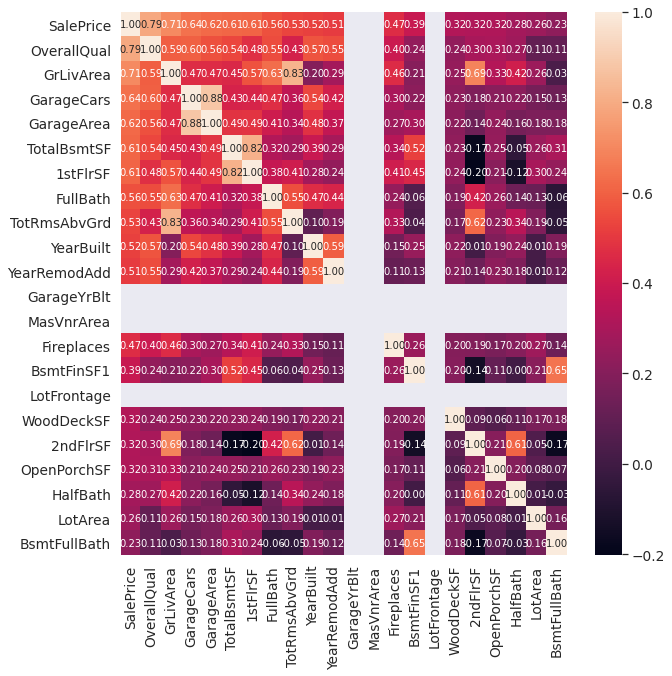

In [15]:
f,ax = plt.subplots(figsize=(10, 10))
corrmat = train_data.corr()
k =22
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
train_data.MasVnrArea.dtype

dtype('float64')

In [ ]:
numerical_column_final = numerical_column
numerical_final_test = numerical_test

In [ ]:
y = numerical_column['SalePrice']
nominal_final = nominal_final.drop(['SalePrice'],axis = 1)
ordinal_final = ordinal_final.drop(['SalePrice'],axis = 1)
numerical_column_final = numerical_column_final.drop(['SalePrice'],axis = 1)

In [ ]:
numerical_final_test.columns #nominal_final_test ordinal_final_test numerical_final_test

Index(['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'LotWidht',
       'OverallQuality', 'TotalBsmtUF', 'TotalBath', 'PorchSf', 'RoomAbcGr',
       'TotalSfFlr', 'Year', 'BsmtFinSFN'],
      dtype='object')

In [ ]:
train = pd.concat([nominal_final,ordinal_final,numerical_column_final],axis = 1)
test = pd.concat([nominal_final_test, ordinal_final_test, numerical_final_test],axis = 1)
#train = pd.concat([ordinal_final,numerical_column_final],axis = 1)
#test = pd.concat([ordinal_final_test, numerical_final_test],axis = 1)

In [ ]:
print(train.shape,' ',test.shape)

(1460, 20)   (1459, 20)


In [ ]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [ ]:
#scaler1 = StandardScaler()
y = np.asarray(y)
y = y.reshape(-1,1)
#scaler1.fit(y)
#y = scaler1.transform(y)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
train = min_max_scaler.fit_transform(train)
test = min_max_scaler.fit_transform(test)
y = min_max_scaler.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)

In [ ]:
regressorTree = DecisionTreeRegressor(criterion='mse', splitter='best',random_state = 0)  
regressorTree.fit(X_train, y_train) 
res = regressorTree.score(X_train, y_train)
print(res*100)
y_pred_tree = regressorTree.predict(X_test)
DTRrmse = (mean_squared_error(y_test, y_pred_tree))**0.5
DTRrmse
# 34 features
#99.99891791227729
#34154.51272228431

# 25 features
99.99891791227729
38059.715640624905

99.9999886395969


38059.715640624905

In [ ]:
regressorGB = GradientBoostingRegressor(
    max_depth=70,
    n_estimators=1000,
    learning_rate=1.0,
    criterion='mse',
)
regressorGB.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressorGB.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
res = regressorGB.score(X_train, y_train)
print(res*100)
y_predGB = regressorGB.predict(X_test)
GBrmse = (mean_squared_error(y_test, y_predGB))**0.5
GBrmse

#98.32619386202857
#32894.028208323754

# 25 features
98.00636885118014
33610.8385170461

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.9999886395969


33610.8385170461

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

82.13463967225023


32692.370436137197

In [ ]:
#max_iter=100000,tol=.0001,early_stopping=False,n_iter_no_change=10000

In [ ]:
passref = PassiveAggressiveRegressor(max_iter=1000000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a**0.5
rmse

43.54540910403765


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0837899961563221

In [ ]:
pred_y = passref.predict(test)

In [ ]:
pred_y

array([-0.01581447,  0.06426859,  0.10044688, ...,  0.09577278,
        0.05372847,  0.20672898])

In [ ]:
pred_y = passref.predict(test)
pred_y = pred_y.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/0.6.csv", index=False)

In [ ]:
X_train.shape

(1168, 31)

Train: 0.002, Test: 0.003


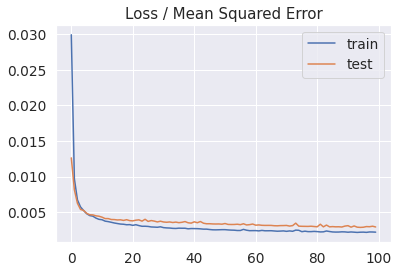

In [ ]:

# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X_train,X_test
#trainy, testy = y_train,y_test
trainy = np.array(y_train)
testy = np.array(y_test)
# reshape 1d arrays to 2d arrays
trainy = trainy #.reshape(len(trainy), 1)
testy = testy #.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
#scaler.fit(trainy)
# transform training dataset
#trainy = scaler.transform(trainy)
# transform test dataset
#testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % ((train_mse), (test_mse)))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred = min_max_scaler.inverse_transform(y_pred)

In [ ]:
y_pred

array([[116875.89 ],
       [152815.2  ],
       [178966.5  ],
       ...,
       [166332.62 ],
       [ 97926.695],
       [222545.33 ]], dtype=float32)

In [ ]:
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/ann.002.csv", index=False)

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [ ]:
tx = numerical_column.drop(['SalePrice'],axis = 1)
ty = numerical_column['SalePrice']

The mean squared error (MSE) on test set: 724313399.2211


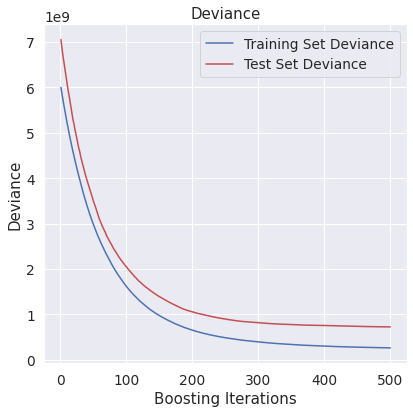

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(tx, ty, test_size=0.2, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5]


IndexError: ignored

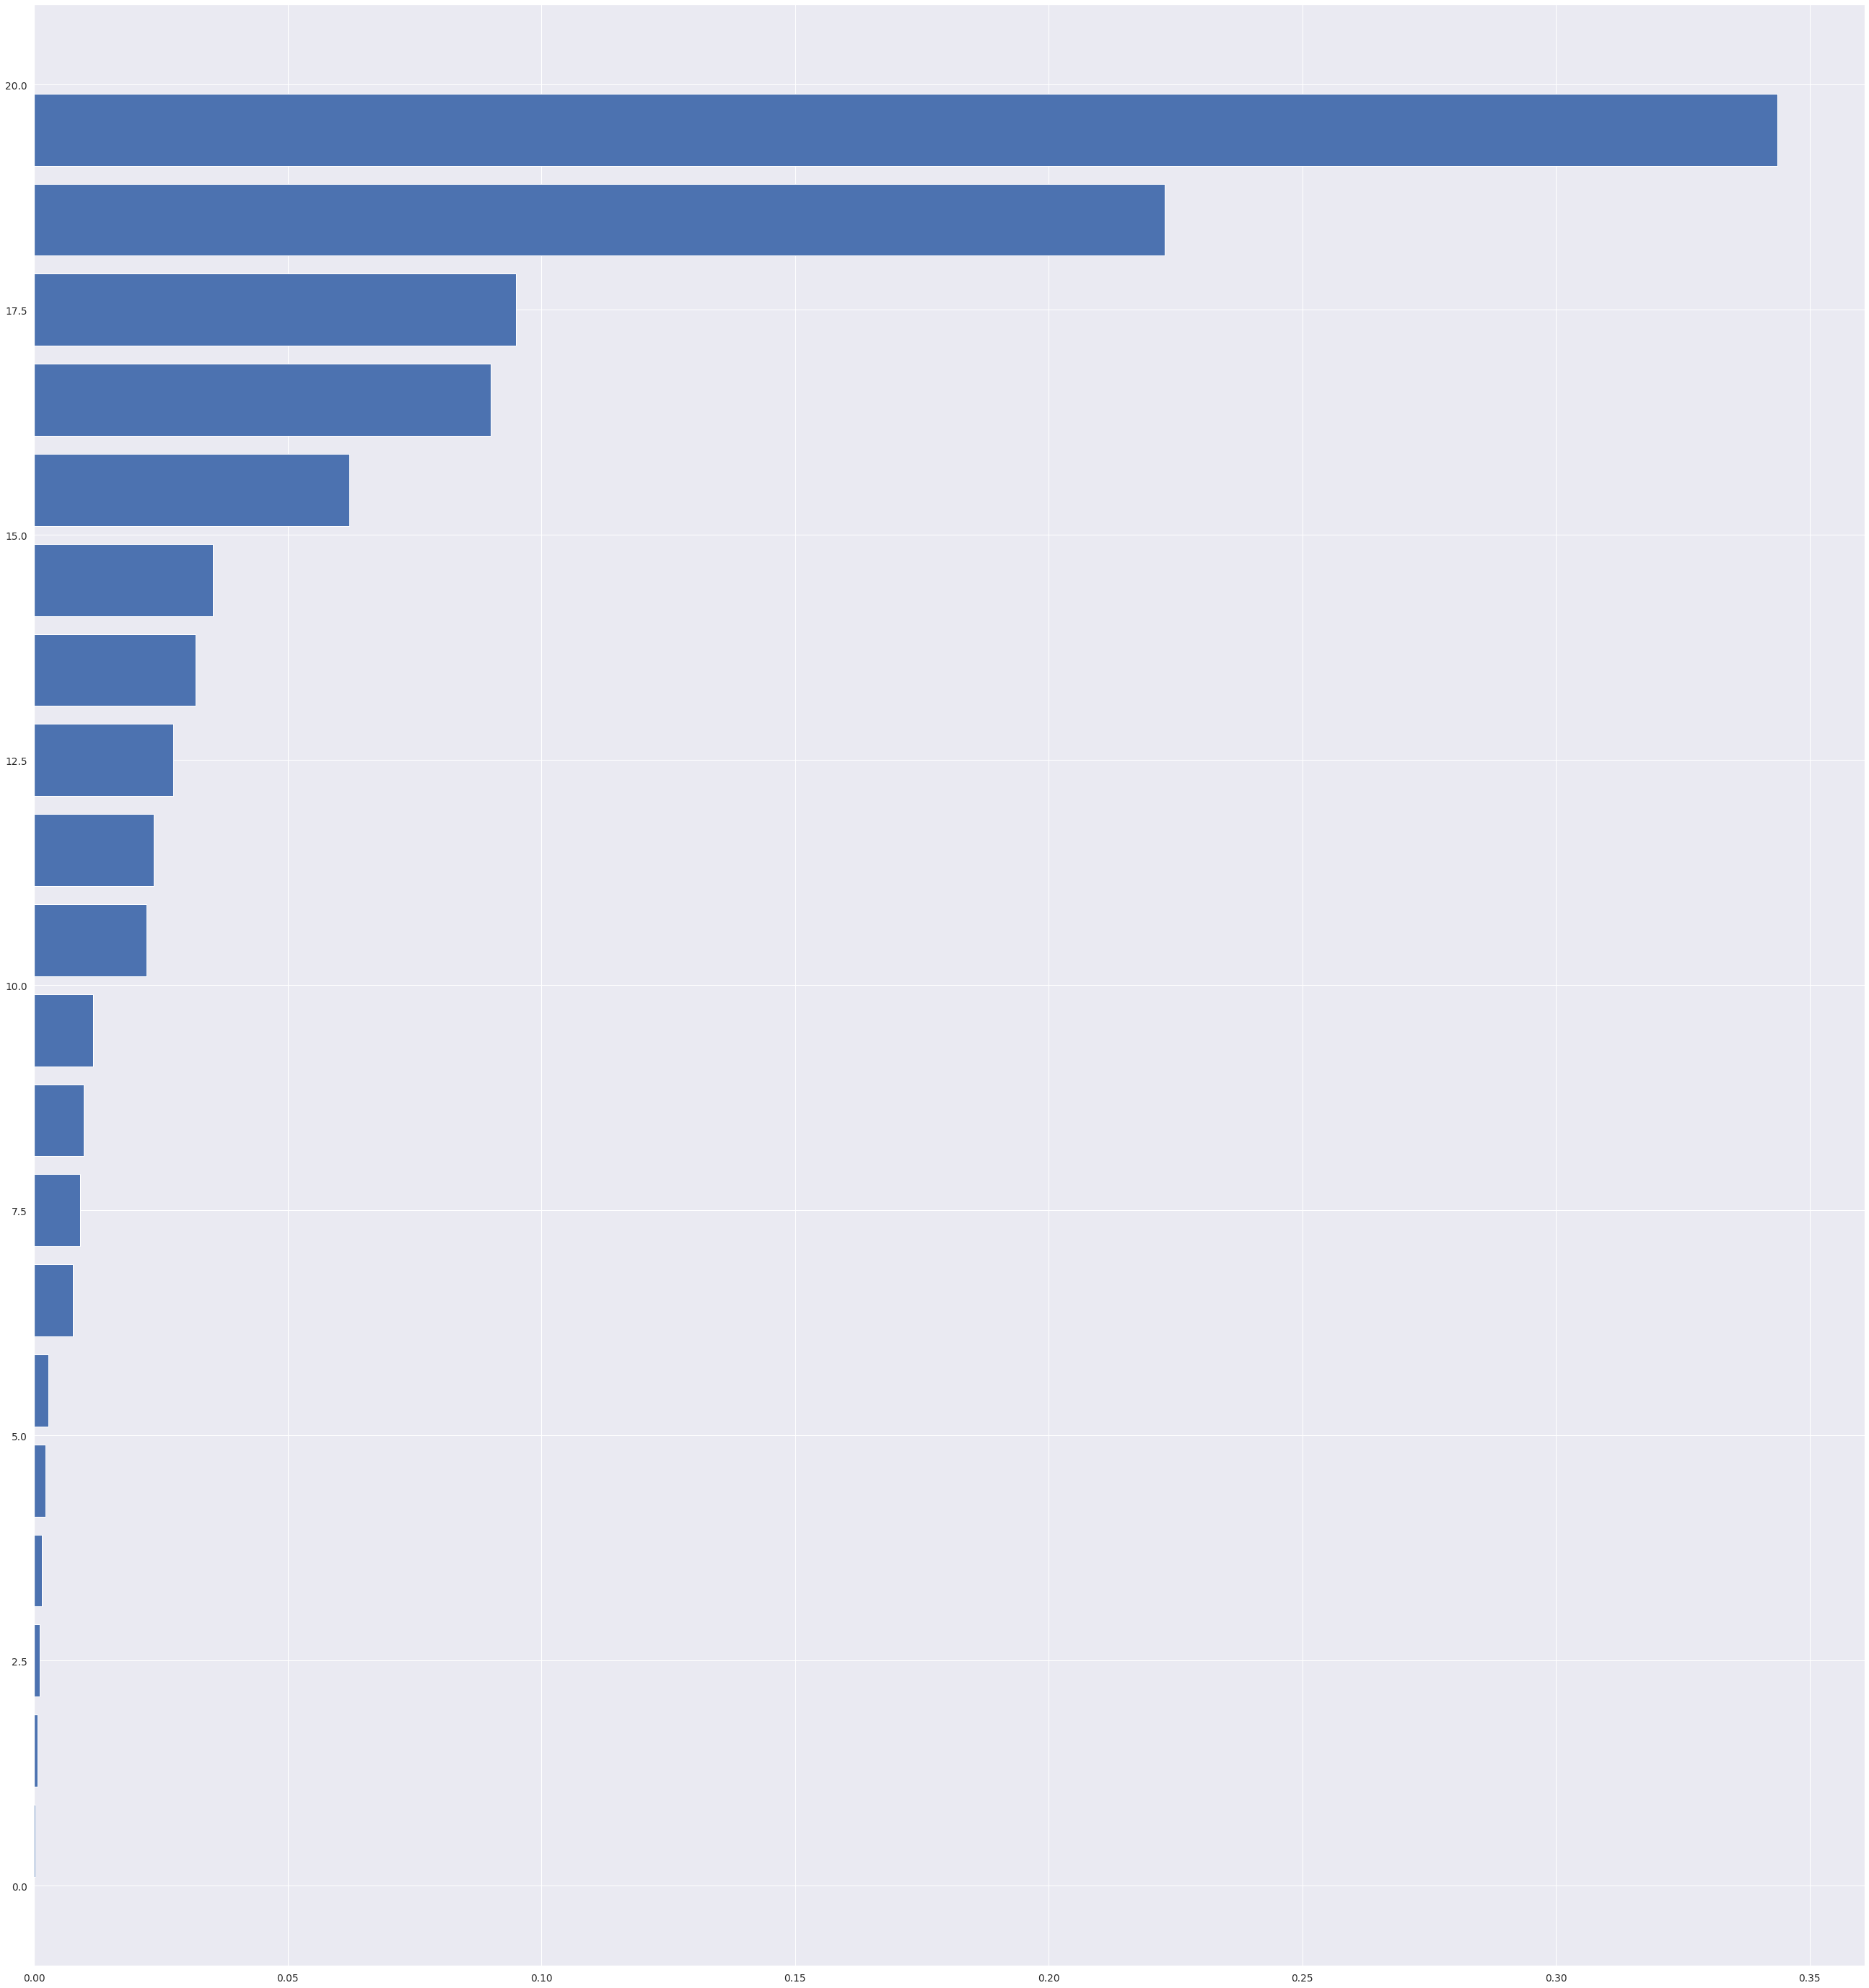

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)
#print(np.array(tx.columns)[sorted_idx])
fig = plt.figure(figsize=(100, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(tx.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
'''
result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,vert=False, labels=np.array(tx.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show() '''

In [ ]:
numerical_column.columns

Index(['MSSubClass', 'MasVnrArea', 'LowQualFinSF', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'SalePrice',
       'LotWidht', 'OverallQuality', 'TotalBsmtUF', 'TotalBath', 'PorchSf',
       'RoomAbcGr', 'TotalSfFlr', 'Year', 'BsmtFinSFN'],
      dtype='object')

In [ ]:
nominal_final = pd.DataFrame()
for i in cols:
  nominal_final[i] = nominal[i]